<div class="alert-danger">
    <h1>PROJECT - 18  BIGMART TRAIN DATA</h1>
</div>

In [3]:
import pandas as pd

In [4]:
# Importing Dataset
df=pd.read_csv("bigdatamart_Train.csv")
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#Checking shape of dataset(How many rows and columns)
df.shape

(8523, 12)

In [7]:
#Checking datatypes of dataset
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

There 7 columns who datatype is object which need to change in numerical value.

In [8]:
#Checking Missing Value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df['Item_Weight'].shape

(8523,)

In [10]:
#Working with missing value
df['Item_Weight'].fillna((df['Item_Weight'].mean()), inplace=True)

In [11]:
df['Item_Weight'].isnull().sum()

0

In [12]:
df['Outlet_Size'].shape

(8523,)

In [13]:
#Working with missing value
df['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [14]:
CV ="Medium"
df['Outlet_Size'] = df['Outlet_Size'].fillna(CV)

In [15]:
df['Outlet_Size'].isnull().sum()

0

In [16]:
#Checking Missing Value Again
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


<h3>EXPLORATORY DATA ANALYSIS</h3>

<h6> Checking Null Value by heatmap: </h6>

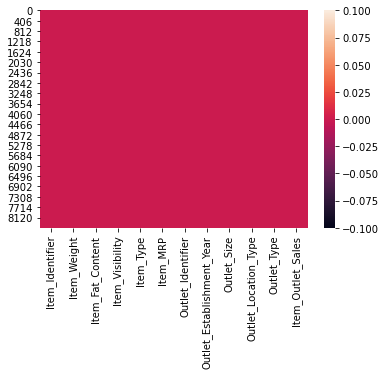

In [18]:
import seaborn as sns
sns.heatmap(df.isnull())

By above plot we can see that there is no any null value present.

<h6> Checking Corelation between data: </h6>

In [19]:
dfcor = df.corr()
dfcor.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048


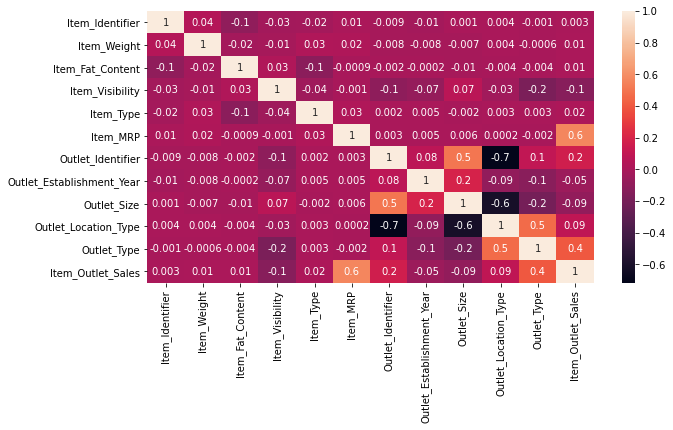

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.heatmap(dfcor,annot=True,fmt='.1g')

In [21]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

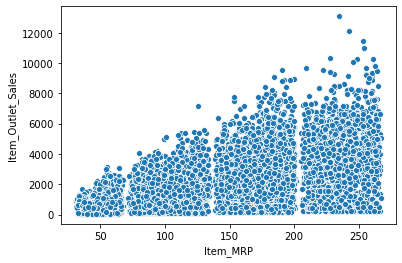

In [22]:
sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",data=df)

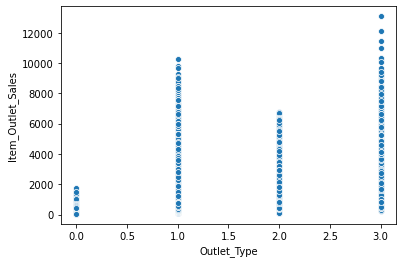

In [23]:
sns.scatterplot(x="Outlet_Type",y="Item_Outlet_Sales",data=df)

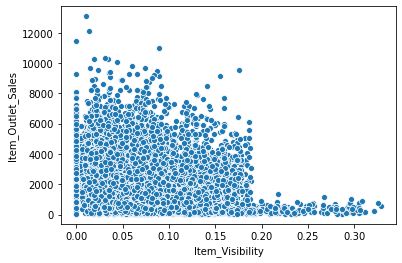

In [24]:
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",data=df)

<h4>
Describing The Data
</h4>

In [25]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


<h4>
Now using Subplot and distplot to check data is normaalised or not
</h4>

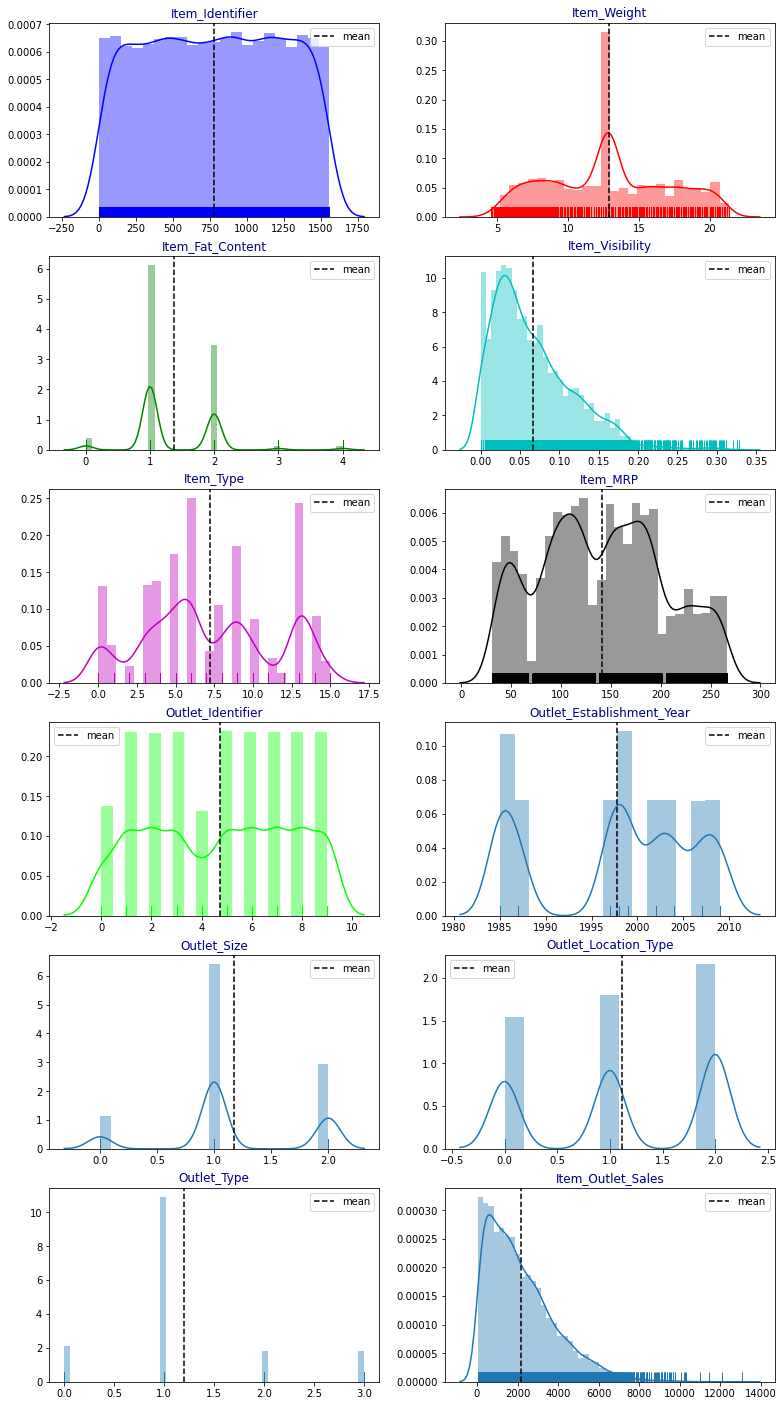

In [26]:
import warnings
warnings.filterwarnings('ignore')
import itertools

cols = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']
length = len(cols)

cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CADB0A29A0>,
      dtype=object)

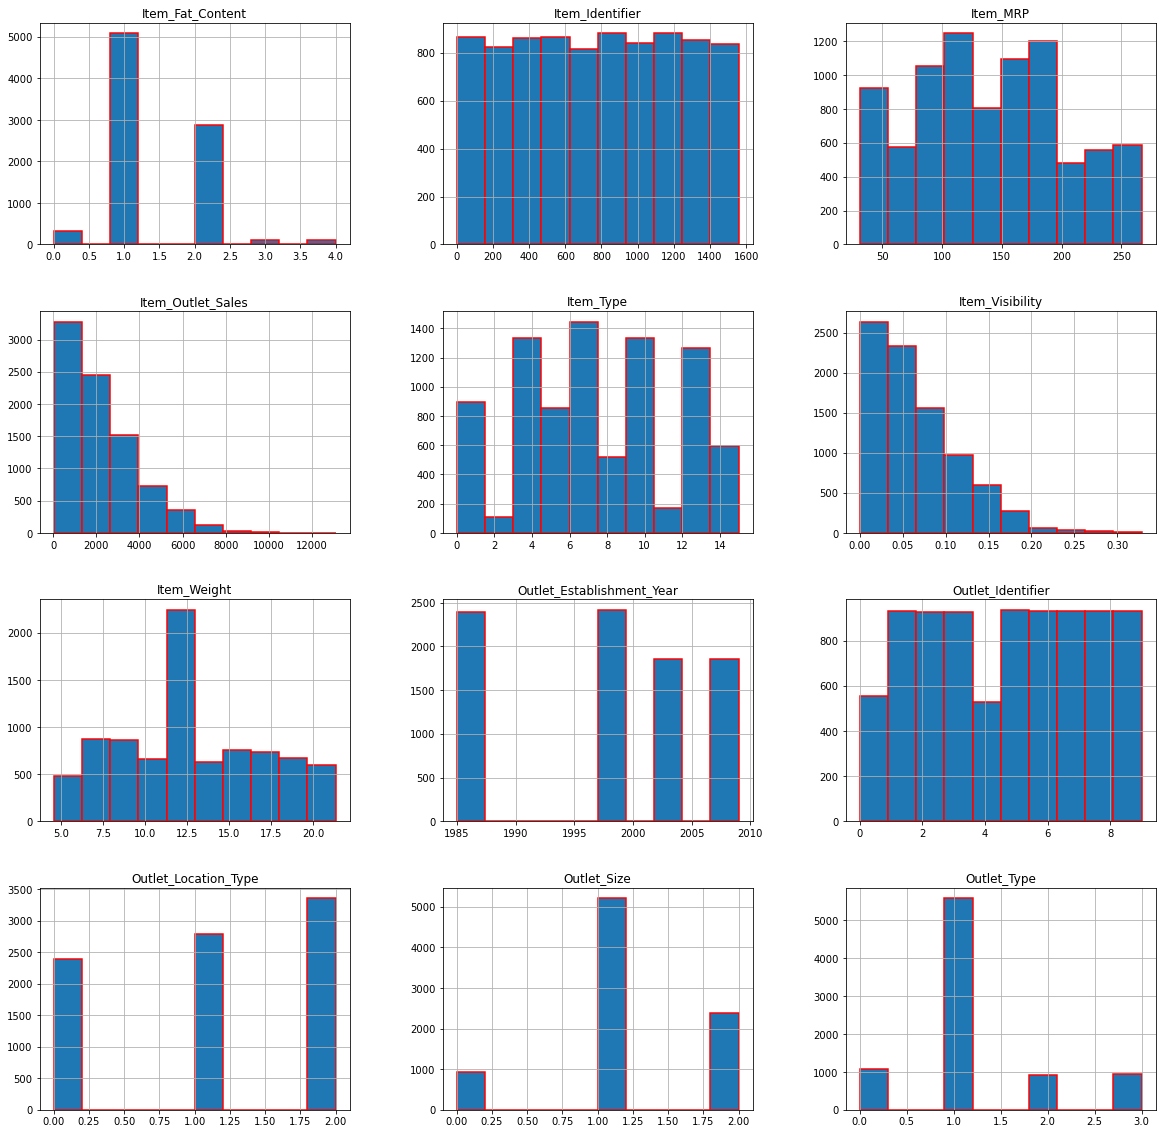

In [27]:
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

Again by above plot we are sure that the data is not normally distributed.

In [28]:
#Checking Skewness in the dataset

df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

<h3>
DATA TRANSFORMATION
</h3>

In [29]:
collist = df.columns.values
ncol=12
nrows=10


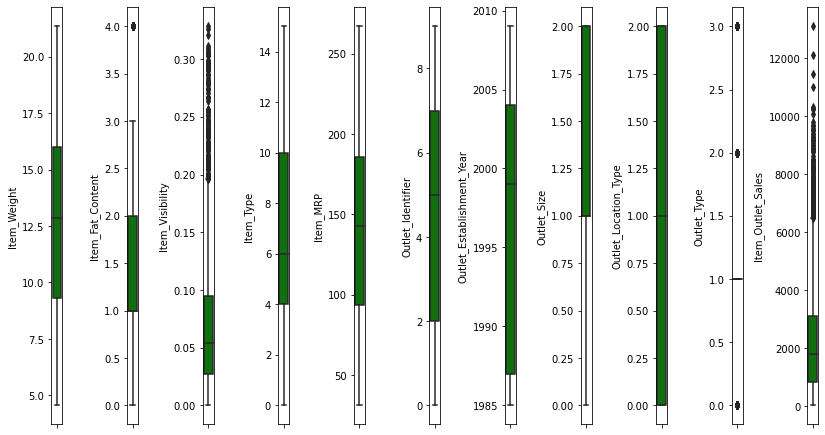

In [30]:
plt.figure(figsize = (ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color ='green',orient='v')
    plt.tight_layout()


In [31]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold =3
new_df = df[(z<3).all(axis=1)]
new_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [32]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [33]:
#Percentage Loss of data after removing outliers
percentage_loss=((8523-8222)/8523)*100
percentage_loss

3.5316203214830457

In [34]:
#IQR Method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Item_Identifier               771.500000
Item_Weight                     6.690000
Item_Fat_Content                1.000000
Item_Visibility                 0.067596
Item_Type                       6.000000
Item_MRP                       91.817200
Outlet_Identifier               5.000000
Outlet_Establishment_Year      17.000000
Outlet_Size                     1.000000
Outlet_Location_Type            2.000000
Outlet_Type                     0.000000
Item_Outlet_Sales            2267.049000
dtype: float64


In [35]:
df_new1 = df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)

(5419, 12)


In [36]:
x= new_df.iloc[:,:-1]
y= new_df.iloc[:,-1]

In [37]:
from sklearn.preprocessing import power_transform
x= power_transform(x,method="yeo-johnson")

In [38]:
x.shape

(8222, 11)

In [39]:
y = y.values.reshape(-1,1)

y.shape



(8222, 1)

<h2>
REGRESSOR MODEL BUILDING
</h2>

<h3>
Linear Regression:
</h3>

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [41]:
#Finding best random state

max_scr = 0
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random_state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-",r2_score(y_test,pred_test)*100)

At random_state  674  The model performs very well
At random_state:- 674
Training r2_score is:- 51.650599599973326
Testing r2_score is:- 51.648397760031315
At random_state  692  The model performs very well
At random_state:- 692
Training r2_score is:- 51.649606006641
Testing r2_score is:- 51.649804083337614
At random_state  716  The model performs very well
At random_state:- 716
Training r2_score is:- 51.635320050083045
Testing r2_score is:- 51.63678846234191


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,test_size = .25,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        
        
        
print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")
    



Best Accuracy 54.27410435562281 found on random_state 151


In [43]:
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_t,y,random_state=151,test_size=0.25)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

<h2>
REGULARIZATION
</h2>

<h3>
1.LASSO
</h3>

In [45]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [46]:
ls = Lasso(alpha=1,random_state = 0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)
lss= r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc = lsscore.mean()
    print('AT CV = ',j)
    print("cross validation score is :- ",lsc*100)
    print("r2_score is :- ",lss*100)
    print("\n")

AT CV =  2
cross validation score is :-  51.470042357788195
r2_score is :-  54.26840531653738


AT CV =  3
cross validation score is :-  51.47674882277986
r2_score is :-  54.26840531653738


AT CV =  4
cross validation score is :-  51.391084924811004
r2_score is :-  54.26840531653738


AT CV =  5
cross validation score is :-  51.45801713382714
r2_score is :-  54.26840531653738


AT CV =  6
cross validation score is :-  51.495576848855585
r2_score is :-  54.26840531653738


AT CV =  7
cross validation score is :-  51.51466187605921
r2_score is :-  54.26840531653738


AT CV =  8
cross validation score is :-  51.46820048148699
r2_score is :-  54.26840531653738


AT CV =  9
cross validation score is :-  51.46832341920864
r2_score is :-  54.26840531653738




From above Observation i can say that at CV=6 model is performing well

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [48]:
print("Error:")

print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,pred_ls))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error:=  830.3742929272623
Mean Squared Error:=  1176592.9619621935
Root Mean Square Error;=  1084.7086991271867


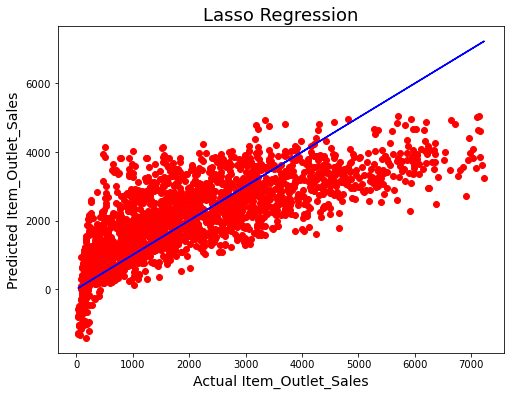

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_ls,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual Item_Outlet_Sales",fontsize = 14)
plt.ylabel("Predicted Item_Outlet_Sales",fontsize =14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

The Above Result shows that the datapoints near the best fit line. I am testing with other algorithms

<h3>
2.RIDGE REGRESSION
</h3>

In [50]:
from sklearn.linear_model import Ridge
parameters = {'alpha':[.0001,.001,.01,.1,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'random_state':list(range(0,10)),'tol':[.0001,.001,.01,.1,1]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.0001}


In [51]:
rd = Ridge(alpha=0.001,copy_X=True,fit_intercept=True,normalize=True,random_state = 0,tol=0.0001)
rd.fit(x_train_b,y_train_b)
rd.score(x_train_b,y_train_b)
pred_rd = rd.predict(x_test_b)
rds= r2_score(y_test_b,pred_rd)
print("R2-Score= ",rds*100)
rdscore = cross_val_score(rd,x_t,y,cv=3)
rdc=rdscore.mean()
print("Cross Val Score= ",rdc*100)

R2-Score=  54.27016385243842
Cross Val Score=  51.47329944039654


In [52]:
print("Error:")

print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,pred_rd))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,pred_rd))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error:
Mean Absolute Error:=  830.3959558701022
Mean Squared Error:=  1176547.7179470037
Root Mean Square Error;=  1084.6878435508547


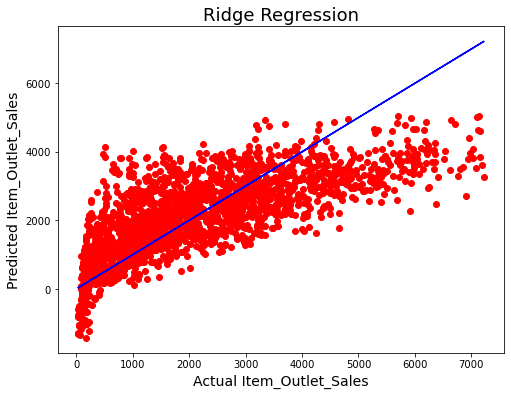

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_rd,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual Item_Outlet_Sales",fontsize = 14)
plt.ylabel("Predicted Item_Outlet_Sales",fontsize =14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

In [54]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt = DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)

{'criterion': 'mae', 'splitter': 'best'}


In [55]:
dt = DecisionTreeRegressor(criterion='mae',splitter='best')
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b,y_train_b)
pred_decision = dt.predict(x_test_b)
dts = r2_score(y_test_b,pred_decision)
print('R2 Score= ',dts*100)


dtscore = cross_val_score(dt,x_t,y,cv=6)
dtc = dtscore.mean()
print('cross_val_score:',dtc*100)

R2 Score=  19.15327885570538
cross_val_score: 14.935281216582913


In [56]:
print("Error:")

print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,pred_decision))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error:
Mean Absolute Error:=  1026.8164490272375
Mean Squared Error:=  2080042.9933508437
Root Mean Square Error;=  1442.2354153711674


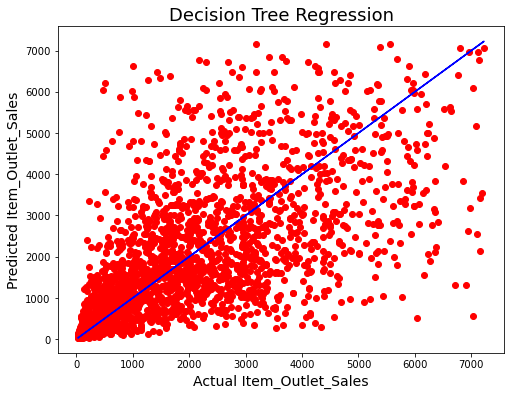

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_decision,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual Item_Outlet_Sales",fontsize = 14)
plt.ylabel("Predicted Item_Outlet_Sales",fontsize =14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['friedman_mse','mae'],'n_estimators':[100,200,300]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)


In [ ]:
rf = RandomForestRegressor(criterion='mae',n_estimators=100)
rf.fit(x_train_b,y_train_b)
rf.score(x_train_b,y_train_b)
pred_random = rf.predict(x_test_b)
rfs = r2_score(y_test_b,pred_random)
print('R2 Score= ',rfs*100)


rfscore = cross_val_score(rf,x_t,y,cv=6)
rfc = rfscore.mean()
print('cross_val_score:',rfc*100)

In [ ]:
print("Error:")

print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,pred_random))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,pred_random))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,pred_random)))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_random,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual Item_Outlet_Sales",fontsize = 14)
plt.ylabel("Predicted Item_Outlet_Sales",fontsize =14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

In [58]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor


In [59]:
parameters = {'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)


{'criterion': 'friedman_mse', 'loss': 'ls', 'n_estimators': 50}


In [62]:
gbr = GradientBoostingRegressor(loss='ls',n_estimators=50,criterion='friedman_mse')
gbr.fit(x_train_b,y_train_b)
gbr.score(x_train_b,y_train_b)
pred_gradient = gbr.predict(x_test_b)
gbrs = r2_score(y_test_b,pred_gradient)
print('R2 Score= ',gbrs*100)


gbrscore = cross_val_score(gbr,x_t,y,cv=6)
gbrc = gbrscore.mean()
print('cross_val_score:',gbrc*100)

R2 Score=  60.876355934083136
cross_val_score: 58.7692181909643


In [63]:
print("Error:")

print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,pred_gradient))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,pred_gradient))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,pred_gradient)))

Error:
Mean Absolute Error:=  727.1412079419911
Mean Squared Error:=  1006582.0921595361
Root Mean Square Error;=  1003.2856483372699


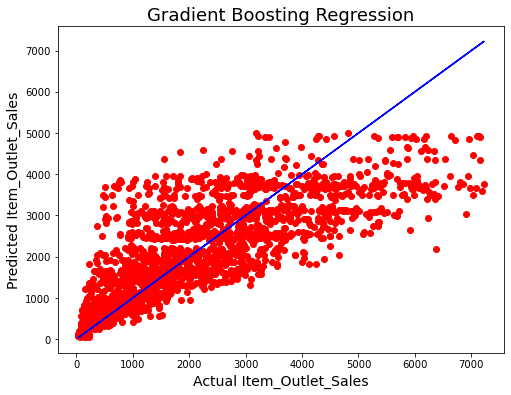

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_gradient,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual Item_Outlet_Sales",fontsize = 14)
plt.ylabel("Predicted Item_Outlet_Sales",fontsize =14)
plt.title('Gradient Boosting Regression',fontsize=18)
plt.show()

In [65]:
from sklearn.svm import SVR

parameters= {'kernel':['Linear','poly','rbf','sigmoid'],'gamma':['auto','scale']}
sv=SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)


{'gamma': 'scale', 'kernel': 'sigmoid'}


In [69]:
sv = SVR(kernel = 'sigmoid',gamma='scale')
sv.fit(x_train_b,y_train_b)
sv.score(x_train_b,y_train_b)
pred_vector = sv.predict(x_test_b)
svs = r2_score(y_test_b,pred_vector)
print('R2 Score= ',svs*100)


svscore = cross_val_score(sv,x_t,y,cv=6)
svc = svscore.mean()
print('cross_val_score:',svc*100)

R2 Score=  17.998490883090902
cross_val_score: 18.784902507259815


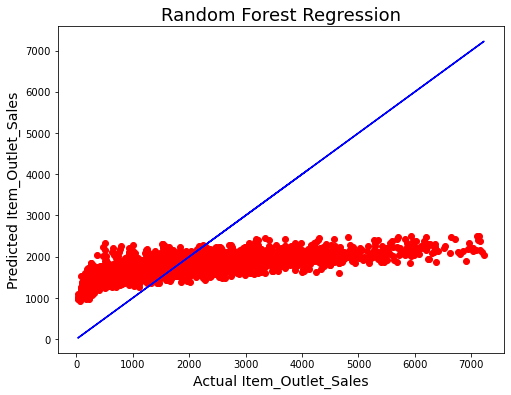

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_vector,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual Item_Outlet_Sales",fontsize = 14)
plt.ylabel("Predicted Item_Outlet_Sales",fontsize =14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

In [72]:
from sklearn.ensemble import AdaBoostRegressor
ADB = AdaBoostRegressor()
ADB.fit(x_train_b,y_train_b)
y_pred = ADB.predict(x_test_b)
r2score = r2_score(y_test_b,y_pred)
cvscore = cross_val_score(AdaBoostRegressor(),x_train_b,y_train_b,cv=6).mean()
print(f"Accuracy = {r2score*100},Cross_val_score={cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")


Accuracy = 58.21677505129228,Cross_val_score=54.15099120443403 & difference = 4.065783846858253


In [73]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor()
SGD.fit(x_train_b,y_train_b)
y_pred = SGD.predict(x_test_b)
r2score = r2_score(y_test_b,y_pred)
cvscore = cross_val_score(SGDRegressor(),x_train_b,y_train_b,cv=6).mean()
print(f"Accuracy = {r2score*100},Cross_val_score={cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")


Accuracy = 54.34696525026364,Cross_val_score=50.32059559227681 & difference = 4.026369657986827


In [74]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train_b,y_train_b)
y_pred = RF.predict(x_test_b)
r2score = r2_score(y_test_b,y_pred)
cvscore = cross_val_score(RandomForestRegressor(),x_train_b,y_train_b,cv=6).mean()
print(f"Accuracy = {r2score*100},Cross_val_score={cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")


Accuracy = 56.00929935148642,Cross_val_score=52.9385478893903 & difference = 3.070751462096119


<h2>
MODEL SAVING
</h2>

In [76]:
import pickle
filename = 'gbrfile.pkl'
pickle.dump(gbr,open(filename,'wb'))

# CONCLUSION

In [77]:
df2=pd.read_csv("bigdatamart_Test.csv")
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [78]:
a=np.array(df2)
a

array([['FDW58', 20.75, 'Low Fat', ..., 'Medium', 'Tier 1',
        'Supermarket Type1'],
       ['FDW14', 8.3, 'reg', ..., nan, 'Tier 2', 'Supermarket Type1'],
       ['NCN55', 14.6, 'Low Fat', ..., nan, 'Tier 3', 'Grocery Store'],
       ...,
       ['NCO17', 10.0, 'Low Fat', ..., nan, 'Tier 2',
        'Supermarket Type1'],
       ['FDJ26', 15.3, 'Regular', ..., nan, 'Tier 2',
        'Supermarket Type1'],
       ['FDU37', 9.5, 'Regular', ..., nan, 'Tier 2', 'Supermarket Type1']],
      dtype=object)

In [79]:
import joblib 

joblib.dump(gbr,'gbrfile.obj')

['gbrfile.obj']

In [80]:
gbr_from_joblib = joblib.load('gbrfile.obj')

In [92]:
gbr_from_joblib

GradientBoostingRegressor(n_estimators=50)

In [83]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [84]:
df2['Item_Weight'].fillna((df2['Item_Weight'].mean()), inplace=True)

In [85]:
CV ="Medium"
df2['Outlet_Size'] = df2['Outlet_Size'].fillna(CV)

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Item_Identifier'] = le.fit_transform(df2['Item_Identifier'])
df2['Item_Fat_Content'] = le.fit_transform(df2['Item_Fat_Content'])
df2['Item_Type'] = le.fit_transform(df2['Item_Type'])
df2['Outlet_Identifier'] = le.fit_transform(df2['Outlet_Identifier'])
df2['Outlet_Size'] = le.fit_transform(df2['Outlet_Size'])
df2['Outlet_Location_Type'] = le.fit_transform(df2['Outlet_Location_Type'])
df2['Outlet_Type'] = le.fit_transform(df2['Outlet_Type'])

df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


In [98]:
b=gbr_from_joblib.predict(df2)
b

array([4922.91360416, 4922.91360416, 4413.71441603, ..., 4922.91360416,
       4922.91360416, 4922.91360416])

In [94]:
#Saving result File Into CSV FORMAT
import numpy

numpy.savetxt("Bigmarttestdata.csv", b, delimiter=",")

# END OF PROJECT